In [82]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [83]:
(x_train , y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

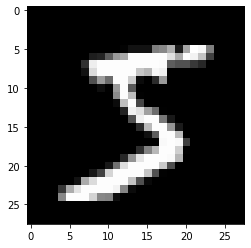

In [84]:
plt.imshow(x_train[0] , cmap="gray")

In [85]:
x_train = x_train/255.0
x_test = x_test/255.0

In [86]:
encoder_input = keras.Input(shape=(28,28,1),name="img")
def deep_auto_encoder():
    x = keras.layers.Flatten()(encoder_input)
    encoder= keras.layers.Dense(64,activation="relu")(x)
    decoder = keras.layers.Dense(784,activation="relu")(encoder)
    decoder = keras.layers.Reshape((28,28,1))(decoder)
    return encoder , decoder


In [87]:
deep_encoder_output , deep_autoencoder_output = deep_auto_encoder()

deep_encoder_model = keras.Model(encoder_input,deep_encoder_output, name="encoder")
deep_autoencoder_model = keras.Model(encoder_input,deep_autoencoder_output,name="autoencoder")

deep_autoencoder_model.summary()
opt = keras.optimizers.Adam(lr=0.001,decay = 1e-6)
deep_autoencoder_model.compile(opt,loss="mse")

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [88]:
autoencoder.fit(x_train,x_train, epochs=8 , batch_size=32 , validation_split=0.1)


Epoch 1/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 2/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 3/8
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 4/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 5/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 6/8
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 8/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0093


In [89]:
example = deep_encoder_model.predict([x_test[6].reshape(-1,28,28,1)])

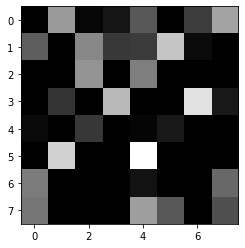

In [90]:
 plt.imshow(example.reshape((8,8)),cmap="gray")

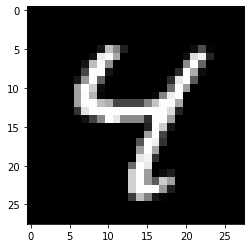

In [91]:
 plt.imshow(x_test[6],cmap="gray")

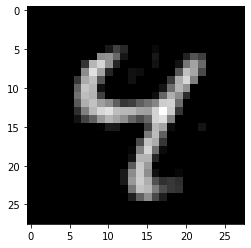

In [92]:
a_out = autoencoder.predict([x_test[6].reshape(-1,28,28,1)])[0]
plt.imshow(a_out,cmap="gray")